<a href="https://colab.research.google.com/github/Anny-Verly/Projeto-Python-MASL/blob/main/Caderno_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <center>  </center>

# <center> Caderno 4 </center>

# <center> Estabilidade de Sistemas de Controle LIT </center>

<p align="justify">
O presente caderno disserta a respeito do conceito de estabilidade, os principais aspectos teóricos são discutidos de forma breve e em conjunto, são apresentadas as  principais funções utilizadas, em Python, para o estudo de tais conceitos.

A estabilidade é a especificação de sistema mais importante, conforme destacado em [[2]](#ref2). Caso um sistema seja instável, a resposta transitória e os erros em regime permanente são uma questão irrelevante. Um sistema instável não pode ser projetado para ter uma resposta transitória especifica ou para atender um requisito de erro em regime permanente.
De modo mais informal, podemos dizer que um sistema é estável se sua resposta a qualquer excitação válida, não sair do controle.

<p align="justify">Existem inúmeras técnicas para determinar se um dado sistema é estável ou não. Neste caderno, as análises de estabilidade para sistemas lineares são realizadas utilizando-se as ferrametas:

* Estabilidade por análise de respostas temporais;
* Estabilidade por meio da localização dos polos no plano $s$;
* Estabilidade utilizando-se a técnica de Routh-Hurwitz;
* Estabilidade por meio da avaliação dos autovalores da matriz dinâmicas de estados.

##4.1 Estabilidade por Análise de Respostas Temporais

 De forma geral, para sistemas LIT temos as seguintes definições [[1]](#ref1):

 <p align="justify">  1. Um sistema é estável se a resposta natural (transitória) tende a zero ou a uma constante à medida que o tempo tende ao infinito.
 <p align="justify">  2. Um sistema é instável se a resposta natural tende a infinito à medida que o tempo tende a infinito.
 <p align="justify">  3. Um sistema é marginalmente estável se a resposta natural (transitória) não decair e não crescer, mas permanecer constante ou oscilar.

Ao longo do Caderno 3 demonstrou-se que para obter a resposta temporal de uma sistema LIT e contínuo no Python, pode-se utilzar a função $ctl.ft()$. O [Exemplo 4.1](#ex41) utiliza esta última função juntamente com os critérios supracitados para analisar a estabilidade de um determinado sistema.



<a name="ex41"></a>
**Exemplo 4.1:**

 <p align="justify">  Considere os sistemas representados nas figuras 4.1 e 4.2, em que X(s) é uma entrada do tipo degrau unitário. Deseja-se investigar a estabilidade desses sistemas utilizando a resposta temporal dos mesmos.

<center>   
<p align="center">
<img src="https://github.com/Anny-Verly/Projeto-Python-MASL/blob/main/Imagens_Caderno_4/Figura%204.1.jpg?raw=true"
width="600" height="" style="display: block; margin: 0 auto" />
</p>  Figura 4.1 </center>

<center>   
<p align="center">
<img src="https://github.com/Anny-Verly/Projeto-Python-MASL/blob/main/Imagens_Caderno_4/Figura%204.2.jpg?raw=true"
width="600" height="" style="display: block; margin: 0 auto" />
</p>  Figura 4.2 </center>

Solução em Python

In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 7.2 MB/s eta 0:00:00


In [ ]:
# importando as bibliotecas
import control as ctl             # Biblioteca que possui as operações típicas de Sistemas de Controle
import numpy as np                # Biblioteca destinada a realizar operações em arrays
import matplotlib.pyplot as plt   # Responsável pela criação de gráficos estáticos ou dinâmicos de alta qualidade.

Text(0.5, 1.0, 'Sistema 2:')

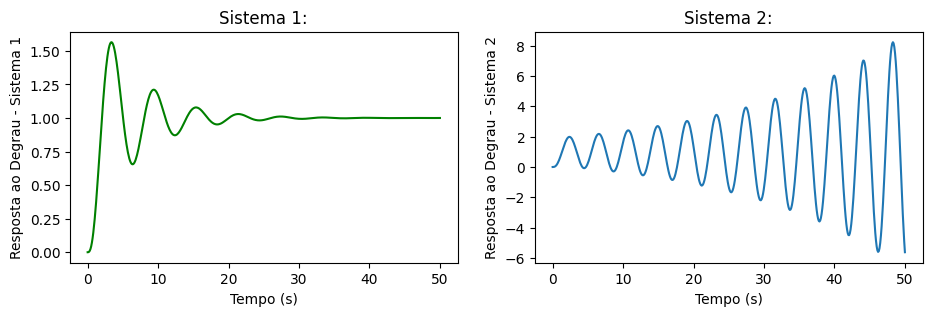

In [ ]:
# Definindo a variável s como simbólica
s = ctl.tf('s')
# Funções de Transferência em MA:
den = s**3 + 3*s**2 + 2*s
G1 = 3/den
G2 = 7/den
numH = 1*s**0
denH = 1*s**0 # Realimentação Unitária
H =  numH/denH
# Funções de Transferência em MF:
T1 = ctl.feedback(G1,H,-1)
T2 = ctl.feedback(G2,H,-1)
#print(G1,G2,H,T1,T2)

# Respostas Temporais para entrada degrau:

# Vetor tempo: definindo conjunto de 500 valores de x entre 0 e 50
t = np.linspace(0,50,500)
# Resposta ao Degrau - sistema 1:
x1,y1 = ctl.step_response(T1,t)
# Resposta ao Degrau - sistema 2:
x2,y2 = ctl.step_response(T2,t)

plt.figure(figsize=(11,3))

plt.subplot(1,2,1);
plt.plot(t,y1, color = 'green')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Degrau - Sistema 1')
plt.title('Sistema 1:')

plt.subplot(1,2,2);
plt.plot(x2,y2)
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Degrau - Sistema 2')
plt.title('Sistema 2:')


<p align="justify">As Respostas temporais obtidas são mostradas na Figura 25. Pode-se observar que as oscilações para o sistema 1 diminuem com o aumento do tempo enquanto no sistema 2 aumentam sem limite. A resposta temporal do primeiro sistema tende a unidade no regime permanente, o que não acontece no sistema 2. Logo, é possível concluir que o Sistema 1 é $\textbf{estável}$ para uma entrada degrau1, e o Sistema 2 é $\textbf{instável}$.

##4.2 A Estabilidade através da Localização de Polos no Plano s
Outra maneira de verificar matematicamente se um sistema é estável consiste em analisar a posição dos polos da função de transferência ao longo do plano s. Por definição, um sistema LIT é estável se e somente se todos os polos da FT do sistema tiverem parte real negativa [[2]](#ref2). A [Figura 4.3](#fig43) ilustra esta condição.

<p align="justify">No Python, basta utilizarmos a função $\textbf{poles}$ mostrada abaixo, encontrar os polos da FT e concluir acerca da estabilidade analisando a parte real dos mesmos.

<center>

```
polos = ctl.poles(sys)
```

</center>

<center>   
<p align="center">
<img src="https://github.com/Anny-Verly/Projeto-Python-MASL/blob/main/Imagens_Caderno_4/Figura%204.3.png?raw=true"
width="800" height="" style="display: block; margin: 0 auto" />
</p>  Figura 4.3 </center>

Onde **p** é o polinômio característico da FT em análise.

O Python apresenta um outro comando que permite vislumbrar visualmente a
posição geométrica dos polos e zeros no plano s. A sintaxe do comando é dada por:

<center>

```
response = ctl.pole_zero_map(sys)
ctl.pole_zero_plot(response)
```

</center>

**Exemplo 4.2:**

Utilize o Scilab para observar o posicionamento dos polos do sistema representado pela [Equação 4.1](#eq41) e conclua sobre a sua estabilidade.

<a name="eq41"></a>
$$ G_s = \frac{1000}{s^3+10s^2+31s+1030} $$
<p align ="right">(4.1)</p>

Solução em Python:

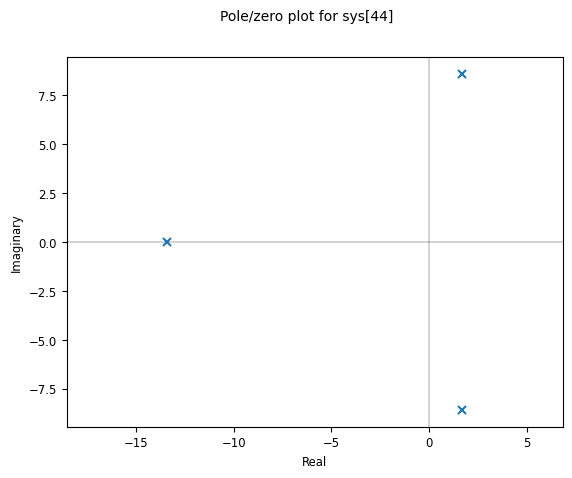

In [ ]:
# Função de Transferência G(s):
num = 1000                          # Numerador da FT
den = s**3 + 10*s**2 + 31*s + 1030  # Denominador da FT
G = num/den                         # Obtenção da FTMA
# Obtenção dos Pólos do Sistema:
polos = ctl.poles(G)
# Diagrama de Polos e Zeros:
ctl.pole_zero_plot(G)

In [ ]:
print(polos)

[-13.41355889+0.j           1.70677944+8.59504957j
   1.70677944-8.59504957j]


<p align="justify">Ao executar o script acima, obtemos os polos do sistema: -13, 41; 1, 70 + 8, 59i e 1, 70-8, 59i. Após a análise da parte real conclui-se que o sistema é instável por apresentar dois pólos no semiplano direito.

Realize ainda uma plotagem dos polos e zeros da FTMF utilizando a função abaixo.
<center>

```
ctl.root_locus_map(sys).plot()
```

</center>

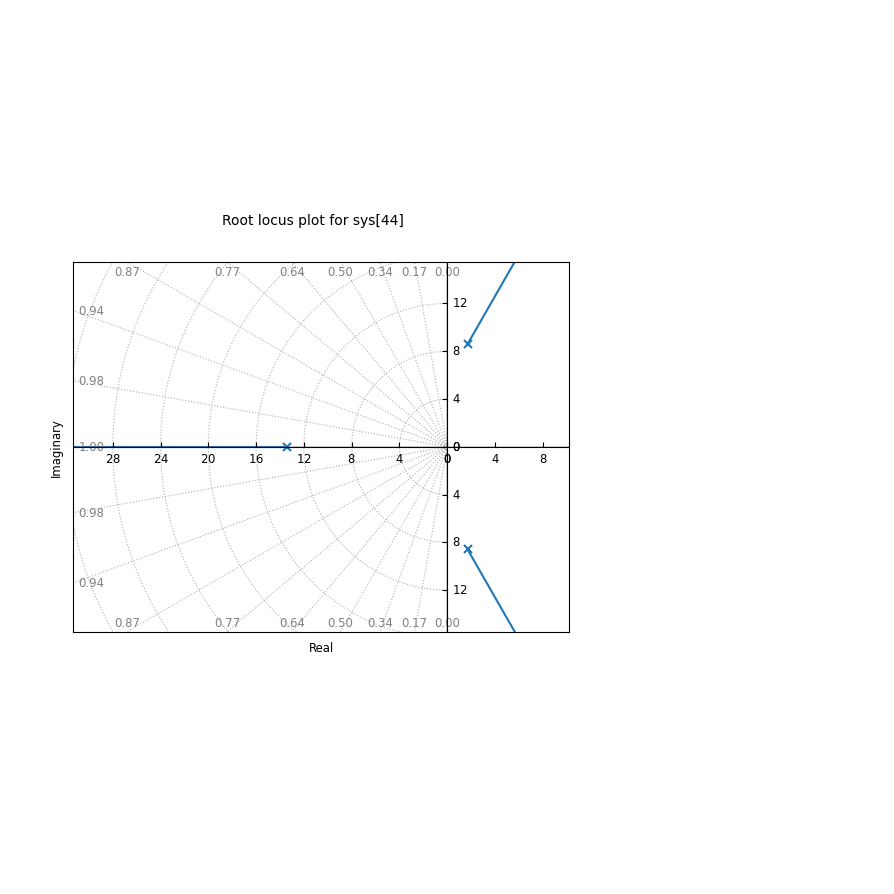

In [ ]:
ctl.root_locus_map(G).plot()

##4.3 O critério de Estabilidade de Routh-Hurwitz:
A. Hurwitz e E.J. Routh desenvolveram um critério simples e prático para a análise de estabilidade de um dado sistema. Este critério verifica se todos os polos de uma FT pertencem ao semi-plano esquerdo do plano s. O método verifica a estabilidade sem a necessidade de obter as raízes do polinômio característico associado [[8]](#ref8). A forma genérica de um polinômio característico, P(s), é mostrada na [Equação 4.2](#eq42).

<a name="eq42"></a>
$$ P(s) = a_0s^n+a_1s^{n-1}+a_2s^{n-2}+...++a_{n-1}s+a_n $$ <p align ="right">(4.2)</p>

Em primeiro lugar, deve-se verificar os coeficientes an da [Equação 4.2](#eq42). A condição necessária, mas não suficiente para a estabilidade, é que todos os coeficientes da equação característica sejam positivos e diferentes de zero. Se esta condição for satisfeita, os coeficientes devem ser organizados segundo o padrão mostrado na Tabela 11.

A [Tabela 11](#tab11) é denominada tabela de Routh. O número de linhas é n + 1. O cálculo dos coeficientes desta tabela e os casos específicos podem ser encontrados nas referências [[1]](#ref1), [[8]](#ref8) ou [[2]](#ref2).

<center>   
<p align="center">
<img src="https://github.com/Anny-Verly/Projeto-Python-MASL/blob/main/Imagens_Caderno_4/Tabela%2011.png?raw=true"
width="300" height="" style="display: block; margin: 0 auto" />
</p>  Tabela 11: Tabela de Routh genérica </center>

</center>

<p align="justify">No Python é possível construir a tabela anterior entrando apenas com o denominador da FT, ou seja, apenas com o polinômio característico, através da função routh_t, conforme mostrado abaixo:
<center>

```
tabela = routh_t(p)
```

</center>

<p align="justify">Este comando computa a tabela de Routh de determinado sistema Single Input Single Output (SISO) 2, através do polinômio característico p.

<p align="justify">Obs: Este comando apresenta a versão original da tabela de Routh, ou seja, não realiza simplificações.

<a name="ex43"></a>
**Exemplo 4.3:**

Deseja-se determinar o número de polos no semiplano da esquerda, no semiplano da direita e sobre o eixo jw para o sistema mostrado na [Figura 4.4](#fig44). Realize ainda uma plotagem dos polos e zeros da FTMF utilizando a função root_locus_map(sys).plot() e discuta sobre a estabilidade do sistema.

<center>   
<p align="center">
<img src="https://github.com/Anny-Verly/Projeto-Python-MASL/blob/main/Imagens_Caderno_4/Figura%204.4.jpg?raw=true"
width="500" height="" style="display: block; margin: 0 auto" />
</p>  Figura 4.4 </center>

Solução em Python:

In [ ]:
pip install tbcontrol # Necessário para a Tabela Routh

In [ ]:
import sympy
from tbcontrol.symbolic import routh

In [ ]:
sympy.init_printing()
x = sympy.Symbol('x')

## Função de Transferência de Malha Aberta G(s)
num = 200                           # Numerador da FT
den = s*(s**3 + 6*s**2 + 11*s + 6)  # Denominador da FT
G = num/den                         # Obtenção da FTMA
# Realimentação Unitária H(s)=1
num1 = 1*s**0                       #Numerador da FT
den1 = 1*s**0                       #Denominador da FT
H = num1/den1                       # Obtenção da FT
# Função de Transferência de Malha Fechada T(s)
T = ctl.feedback(G,H,-1)
# Polinômio Caracteristico P(s):
P_coef = np.poly(T.poles())
P = sympy.Poly(P_coef, x)
# Gerando a tabela de Routh:
routh(P)                            # Rara essa funcionar, ela precisa do sympy.Poly

⎡      1.0         11.0000000000001  200.0⎤
⎢                                         ⎥
⎢6.00000000000002  6.00000000000007    0  ⎥
⎢                                         ⎥
⎢      10.0             200.0          0  ⎥
⎢                                         ⎥
⎢     -114.0              0            0  ⎥
⎢                                         ⎥
⎣     200.0               0            0  ⎦

Colocar tabela aqui

A Tabela 12 mostra a tabela de Routh gerada pelo Scilab. Observa-se que na linhas 1 há um coeficiente negativo. Deste modo, existem duas mudanças de sinal levando a conclusão de que o sistema é **instável**. Este sistema não pode possuir polos sobre o eixo jw uma vez que não temos uma linha de zeros na tabela de Routh. Logo, o sistema apresenta dois polos no semiplano direito e dois polos no semiplano esquerdo.


##4.4 A estabilidade através da localização dos autovalores da matriz de estados

Nas seções anteriores, a estabilidade foi analisada com base no plano s. Agora, será analisada sob a ótica do EE. Segundo [[2]](#ref2), podemos determinar a estabilidade de um sistema representado no espaço de estados obtendo os autovalores da matriz de sistema, A, e determinando suas posições no plano s.
<p align="justify">No Python, podemos calcular os autovalores da matriz de estados através da função spec. A sintaxe do comando é mostrada abaixo.
<center>

```
autovalores, autovetores = np.linalg.eig(A)
```

</center>

O [Exemplo 4.4](#ex44) demonstra a utilização desta função para concluir sobre a estabilidade de um modelo em EE.

**Exemplo 4.4:**
<a name="ex44"></a>

Considere o sistema representado pela [Equação 4.3](#eq43). Deseja-se determinar quantos polos estão no semiplano da esquerda, no semiplano da direita e sobre o eixo jw.

<a name="eq43"></a>
$$
\dot{x} =
\begin{bmatrix}
0 & 3 & 1 \\
2 & 8 & 1 \\
-10 & -5 & -2\\
\end{bmatrix}
x+
\begin{bmatrix}
10\\
0\\
0
\end{bmatrix}
u\\
y =
\begin{bmatrix}
1 & 0 & 0
\end{bmatrix}
x
$$
<p align ="right">(4.3)</p>

In [ ]:
# Matriz de Estados:
A = [ [0, 3, 1], [2, 8, 1], [-10, -5, -2]]
# Autovalores:
autovalores, autovetores = np.linalg.eig(A)
print(autovalores)

[-0.88209059+2.43296907j -0.88209059-2.43296907j  7.76418118+0.j        ]


Os autovalores encontrados foram -0, 88 + j2, 43; -0, 88 - j2, 43 e 7, 764. Através do posicionamento destes pode-se concluir que o sistema é instável e apresenta um polo no semiplano da esquerda e um polo no semiplano da direita.

##4.5 Referências
<a name="ref1"></a>
1 DORF, R. C.; BISHOP, R. H. Modern Control Systems. [S.l.]: Prentice Hall, 2011.

<a name="ref2"></a>
2 NISE, N. S. Control Systems Engineering. [S.l.]: John Wiley & Sons, 2007.

<a name="ref3"></a>
3 GIUSTINA, E. D.; SIENA, W. Utilização de ferramenta computacional scilab para o planejamento de trajetórias robóticas via polinômio de terceira ordem. XIV CONEMI, 2014.

<a name="ref4"></a>
4 MANUAL Scilab Versão 5.5.2, 2015. [S.l.].

<a name="ref5"></a>
5 LOPES, L. C. O. Utilizando o scilab na resolução de problemas da engenharia química. XV COBEQ, 2004.

<a name="ref6"></a>
6 AMANTEA, R. P. Algoritmos e Lógica de Programação - Práticas de Laboratório.
Centro Universitário UNA. 2014.

<a name="ref7"></a>
7 OPPENHEIM, A. V. Sinais e sistemas. 3ª edição. ed. [S.l.]: Prentice-Hall, 2010.

<a name="ref8"></a>
8 OGATA, K. Modern control engineering. [S.l.]: Prentice Hall PTR, 2001.

<a name="ref9"></a>
9 SANTOS, R. J. Introdução às equações diferenciais ordinárias. 2011.

<a name="ref10"></a>
10 HILDEBRAND, F. B. Advanced calculus for applications. [S.l.]: Prentice-Hall
Englewood Cliffs, NJ, 1962. v. 63.

<a name="ref11"></a>
11 SCHNEIDER, R. T. Pneumatic robots continue to improve. Hydraulics & Pneumatics, p. 38–39, October 1992.

<a name="ref12"></a>
12 CASTRUCCI, P.; BITTAR, A.; SALES, R. Controle Automático. [S.l.]: GEN/LTC,
2011